In [46]:
# -*- coding: utf-8 -*-
# 下载某个导演的电影数据集
from efficient_apriori import apriori
from lxml import etree
import time
from selenium import webdriver
import csv

path = "D:\Software\chromedriver\chromedriver.exe" #此处需要修改为本地chromedriver地址
driver = webdriver.Chrome(executable_path=path) #打开浏览器
# 设置想要下载的导演 数据集
director = u'宁浩'
# 写CSV文件
file_name = './' + director + '.csv'
base_url = 'https://movie.douban.com/subject_search?search_text='+director+'&cat=1002&start='
out = open(file_name,'w', newline='', encoding='utf-8-sig')
csv_write = csv.writer(out, dialect='excel')
flags=[]
# 下载指定页面的数据
def download(request_url):
	driver.get(request_url)
	time.sleep(1)
	html = driver.find_element_by_xpath("//*").get_attribute("outerHTML")
	html = etree.HTML(html)
	# 设置电影名称，导演演员 的XPATH
	movie_lists = html.xpath("/html/body/div[@id='wrapper']/div[@id='root']/div[1]//div[@class='item-root']/div[@class='detail']/div[@class='title']/a[@class='title-text']")
	name_lists = html.xpath("/html/body/div[@id='wrapper']/div[@id='root']/div[1]//div[@class='item-root']/div[@class='detail']/div[@class='meta abstract_2']")
	# 获取返回的数据个数
	num = len(movie_lists)
	if num > 15: #第一页会有16条数据
		# 默认第一个不是，所以需要去掉
		movie_lists = movie_lists[1:]
		name_lists = name_lists[1:]
	for (movie, name_list) in zip(movie_lists, name_lists):
		# 会存在数据为空的情况
		if name_list.text is None: 
			continue
		# 显示下演员名称
		print(name_list.text)
		names = name_list.text.split('/')
		# 判断导演是否为指定的director
		if names[0].strip() == director and movie.text not in flags:
			# 将第一个字段设置为电影名称
			names[0] = movie.text
			flags.append(movie.text)
			csv_write.writerow(names)
	print('OK') # 代表这页数据下载成功
	print(num)
	if num >= 14: #有可能一页会有14个电影
		# 继续下一页
		return True
	else:
		# 没有下一页
		return False

# 开始的ID为0，每页增加15
start = 0
while start<10000: #最多抽取1万部电影
	request_url = base_url + str(start)
	# 下载数据，并返回是否有下一页
	flag = download(request_url)
	if flag:
		start = start + 15
	else:
		break
out.close()
print('finished')


郭帆 / 屈楚萧 / 吴京 / 李光洁 / 吴孟达 / 赵今麦 / 隋凯 / 屈菁菁 / 张亦驰
文牧野 / 徐峥 / 王传君 / 周一围 / 谭卓 / 章宇 / 杨新鸣 / 王佳佳 / 王砚辉
陈凯歌 / 张一白 / 管虎 / 薛晓路 / 徐峥 / 宁浩 / 文牧野 / 黄渤 / 张译 / 韩昊霖 / 杜江 / 葛优 / 刘昊然 / 宋佳 / 王千源
宁浩 / 郭涛 / 刘桦 / 连晋 / 黄渤 / 徐峥 / 优恵 / 罗兰  / 王迅
宁浩 / 黄渤 / 沈腾 / 汤姆·派福瑞 / 马修·莫里森 / 徐峥 / 于和伟 / 雷佳音 / 刘桦
黄渤 / 舒淇 / 王宝强 / 张艺兴 / 于和伟 / 王迅 / 李勤勤 / 李又麟
管虎 / 冯小刚 / 许晴 / 张涵予 / 刘桦 / 李易峰 / 吴亦凡 / 梁静 / 白举纲
宁浩 / 徐峥 / 黄渤 / 余男 / 多布杰 / 王双宝 / 巴多 / 杨新鸣 / 郭虹
宁浩 / 黄渤 / 徐峥 / 袁泉 / 周冬雨 / 陶慧 / 岳小军 / 沈腾 / 张俪
宁浩 / 黄渤 / 戎祥 / 九孔 / 徐峥 / 王双宝 / 巴多 / 董立范 / 高捷
丁晟 / 王凯 / 马天宇 / 王大陆 / 余皑磊 / 林雪 / 吴樾 / 李梦 / 张艺上
许鞍华 / 叶德娴 / 刘德华 / 秦海璐 / 秦沛 / 黄秋生 / 王馥荔 / 朱慧敏 / 江美仪
宁浩 / 雷佳音 / 陶虹 / 程媛媛 / 山崎敬一 / 郭涛 / 范伟 / 孙淳 / 刘桦
张一白 / 李亚鹏 / 徐静蕾 / 王学兵 / 何洁 / 程伊 / 崔达治 / 优恵 / 陈明
乌尔善 / 安藤政信 / 张雨绮 / 游本昌 / 刘晓晔 / 徐冲 / 韩鹏翼 / 刘桦 / 宁浩
OK
16
宁浩 / 李强
毕蜂 / 窦文涛 / 梁文道 / 许子东 / 马家辉 / 竹幼婷 / 查建英 / 周轶君 / 林玮婕
黄渤 / 舒淇 / 王宝强 / 张艺兴 / 于和伟 / 王迅 / 李勤勤 / 李又麟
叶烽 / 王自健 / 中孝介 / 宁浩 / 李东学 / 黄龄 / 宋丹丹 / 王雷 / 范明
宁浩 / 张子贤 / 李嘉宇 / 李世成 / 孙麒鹏 / 王晶晶
宁浩 / 黄渤 / 王柏伦 / 聂鑫 / 王迅 / 岳小军
宁浩 / 达瓦 / 毕力格 / 戈利班
宁浩 / 葛优 / 刘德华
宁浩 

In [49]:
# -*- coding: utf-8 -*-
# 分析某导演的电影的 频繁项集和关联规则
from efficient_apriori import apriori
import csv
director = u'宁浩'
file_name = './'+director+'.csv'
lists = csv.reader(open(file_name, 'r', encoding='utf-8-sig'))
# 数据加载
data = [] 
for names in lists: 
    name_new = []
    for name in names:
		# 去掉演员数据中的空格
        name_new.append(name.strip())
    data.append(name_new[1:])

# 挖掘频繁项集和关联规则
#itemsets, rules = apriori(data, min_support=0.05,  min_confidence=1)
itemsets, rules = apriori(data, min_support=0.2,  min_confidence=1)
print('频繁项集：', itemsets)
print('关联规则：', rules)


频繁项集： {1: {('黄渤',): 6, ('刘桦',): 3, ('徐峥',): 5}, 2: {('徐峥', '黄渤'): 5}}
关联规则： [{徐峥} -> {黄渤}]


In [55]:
all_word = ''
for names in data:
    all_word +=  ' '.join(names) 

根据词频，开始生成词云!
郭涛   刘桦   连晋   黄渤   徐峥   优 恵   罗兰   王迅 黄 渤   沈腾   汤姆 · 派福瑞   马修 · 莫里森   徐峥   于和伟   雷 佳音   刘桦 徐峥   黄渤   余 男   多布杰   王双宝   巴 多   杨新鸣   郭虹 黄 渤   徐峥   袁泉   周 冬雨   陶慧   岳小军   沈腾   张俪 黄 渤   戎祥   九孔   徐峥   王双宝   巴 多   董立范   高捷雷 佳音   陶虹   程媛媛   山崎 敬一   郭涛   范伟   孙淳   刘桦 李强 张子贤   李嘉宇   李世成   孙麒鹏   王 晶晶 黄渤   王柏伦   聂鑫   王迅   岳小军 达瓦   毕力 格   戈利班 葛优   刘德华 关宇   傅羽鸽   常爱 军   郝宜 珊 蔡鹭   毕秀茹   唐 笑笑


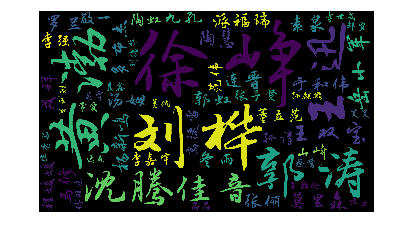

In [58]:
import requests
import sys
import re
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
from PIL import Image
import numpy as np
from lxml import etree

# 生成词云
def create_word_cloud(f):
	print('根据词频，开始生成词云!')
	f = remove_stop_words(f)
	cut_text = " ".join(jieba.cut(f,cut_all=False, HMM=True))
	wc = WordCloud(
		font_path="./wc.ttf",
		max_words=100,
		width=2000,
		height=1200,
    ) 
	wordcloud = wc.generate(cut_text)
	# 写词云图片
	wordcloud.to_file("wordcloud.jpg")
	# 显示词云文件
	plt.imshow(wordcloud)
	plt.axis("off")
	plt.show()

# 去掉停用词
def remove_stop_words(f):
	stop_words = ['作词', '作曲', '编曲', 'Arranger', '录音', '混音', '人声', 'Vocal', '弦乐', 'Keyboard', '键盘', '编辑', '助理', 'Assistants', 'Mixing', 'Editing', 'Recording', '音乐', '制作', 'Producer', '发行', 'produced', 'and', 'distributed']
	for stop_word in stop_words:
		f = f.replace(stop_word, '')
	return f 
#根据词频 生成词云
create_word_cloud(all_word)